<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Input
from tensorflow.keras.utils import to_categorical

Load the dataset

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


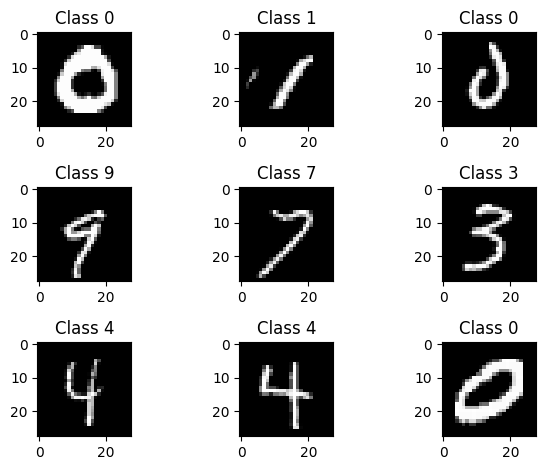

In [3]:
for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(X_train))
  plt.imshow(X_train[num],cmap='gray',interpolation='none')
  plt.title(f"Class {y_train[num]}")

plt.tight_layout()

Data Preprocessing

In [4]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /=255

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")

X_train shape : (60000, 784)
X_test shape : (10000, 784)


In [5]:
no_classes = 10

y_train = to_categorical(y_train,no_classes)
y_test = to_categorical(y_test,no_classes)


Model Building

In [6]:
model = Sequential([
    Input(shape=(784,)),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

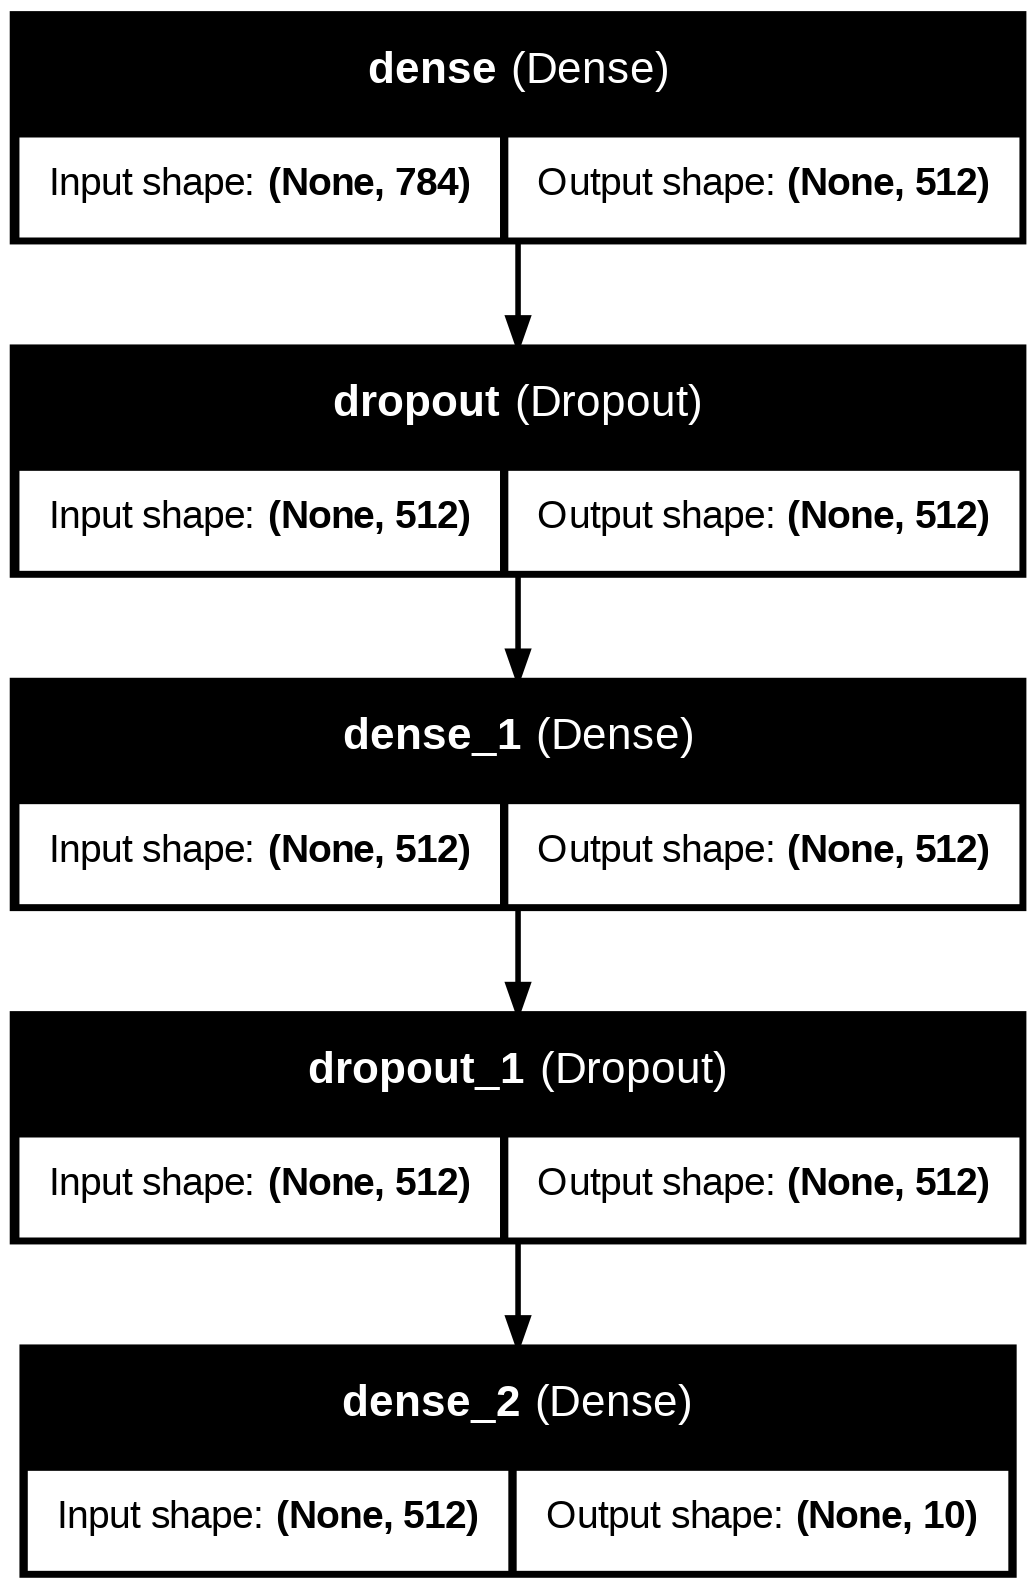

In [7]:
from keras.utils import plot_model

plot_model(model,to_file='model_chart.png',show_shapes=True,show_layer_names=True)
from IPython.display import Image
Image('model_chart.png')

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,batch_size=64,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9924 - loss: 0.0306 - val_accuracy: 0.9896 - val_loss: 0.0366
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9923 - val_loss: 0.0311
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9964 - loss: 0.0144 - val_accuracy: 0.9908 - val_loss: 0.0391
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9950 - loss: 0.0160 - val_accuracy: 0.9906 - val_loss: 0.0462
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9961 - loss: 0.0153 - val_accuracy: 0.9926 - val_loss: 0.0308
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9956 - loss: 0.0150 - val_accuracy: 0.9894 - val_loss: 0.0507
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9906 - val_loss: 0.0461
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.

In [17]:
score = model.evaluate(X_test,y_test)
print(f"Test accuracy : {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9805 - loss: 0.1581
Test accuracy : 0.9832000136375427


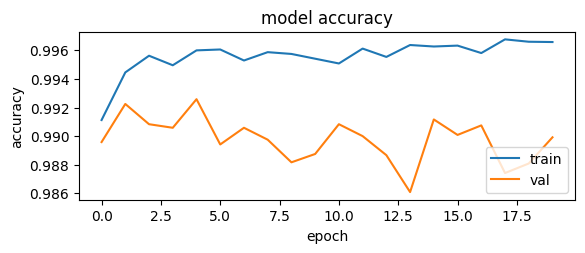

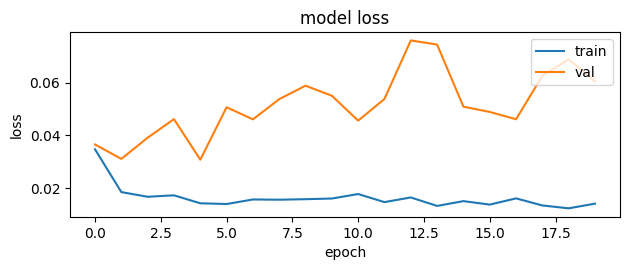

In [21]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()